In [1]:
#Raymond Miller
#Astropy.modeling

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize

In [3]:
# Fit a linear model using astropy.modeling. We are importing data of Type II Cepheids.
# These are stars that pulsate with a period of 1-50 days. We are going to measure
# the Cepheids Period-Luminosity relation. If a star has a longer period, the further it is.

In [4]:
catalog = Vizier.get_catalogs('J/A+A/605/A100')

In [5]:
# Period is the time between pulses and magnitude is the measurement of brightness
# Ksmag = magnitude, e Ksmag = error bars in the measurements
period = np.array(catalog[0]['Period'])
log_period = np.log10(period)
k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])

Text(0, 0.5, 'Ks')

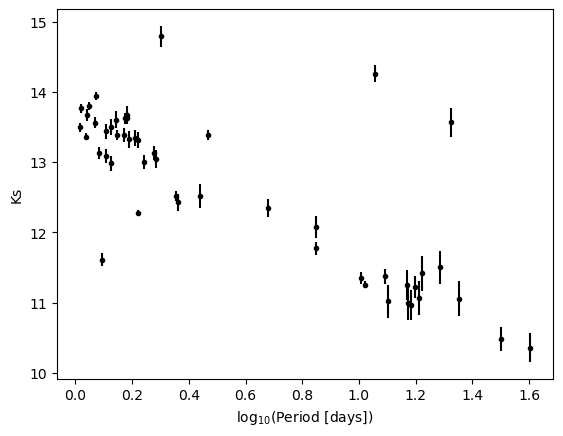

In [6]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

In [7]:
# Making a model in Astropy
model = models.Linear1D()

In [8]:
# LinearLSQFitter is a class performing linear least square fitting
fitter = fitting.LinearLSQFitter()

In [9]:
best_fit = fitter(model, log_period, k_mag, weights=1.0/k_mag_err**2)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -2.0981402575088923 13.418358846900373


Text(0, 0.5, 'Ks')

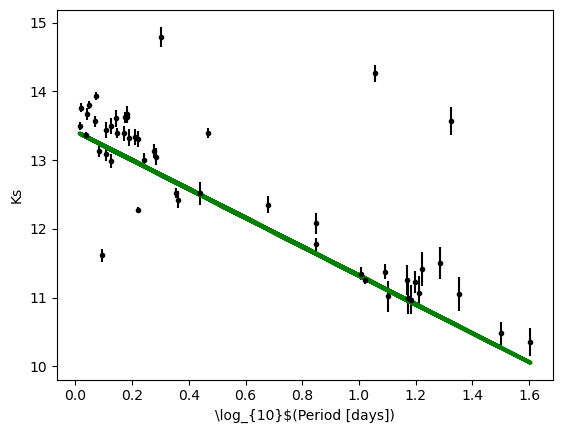

In [10]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.plot(log_period, best_fit(log_period), color='g', linewidth=3)
plt.xlabel(r'\log_{10}$(Period [days])')
plt.ylabel('Ks')

In [11]:
# An example of creating a Polynomial model with astropy.
# This is not real data but to show how it is done.

N = 100
x1 = np.linspace(0, 4, N)
y1 = x1**3 - 6*x1**2 + 12*x1 - 9
# Adding random gaussian noise. It is added to simulate real-world data measurement errors
y1 += np.random.normal(0, 2, size=len(y1))
sigma = 1.5
y1_err = np.ones(N)*sigma

Text(0, 0.5, '$y_1$')

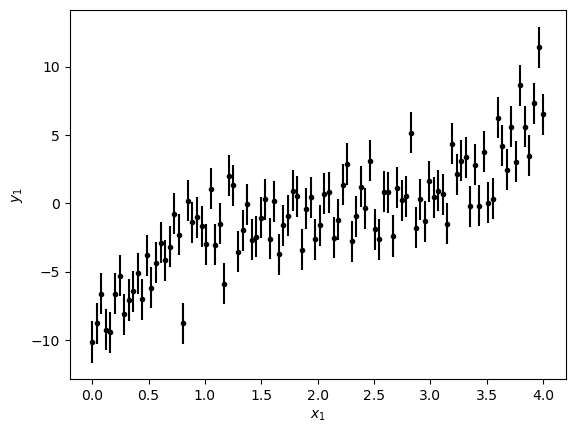

In [12]:
plt.errorbar(x1, y1, yerr=y1_err, fmt='k.')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')

In [13]:
model_poly = models.Polynomial1D(degree=3)
fitter_poly = fitting.LinearLSQFitter()
best_fit_poly = fitter_poly(model_poly, x1, y1, weights = 1.0/y1_err**2)

In [14]:
print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                 c2                 c3       
    ------------------ ------------------ ------------------ -----------------
    -9.743767334460976 12.681564437104491 -6.031739567979246 0.985741022860164


In [15]:
#QUESTION: How does the choice of which numerical computation method we've learned affect the accuracy of the results?
# Are some better than others and when to know which one to implement to get better accurate results?

In [16]:
#EXPERIMENT: Determining the orbit of a planet in our solar system using Astropy.
# We could present figures showing the positioning, velocity, and acceleration of the planet's orbit over time.
# The x-y axes would present the position of the planet over a period of time.